Çoklu doğrusal model için son çalışmam olacak. Bu çalışma da kategorik değişkenleri regresyon modeline nasıl entegre edebiliriz bunun çalışmasını yapacağım.

In [8]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Veriyi yükleme ve eksik değer kontrolü
data = sns.load_dataset("tips")
data2 = data.copy()
print(data2.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [3]:
# encoding yapmak için verilerimizi kontrol ettik bir hiyerarşik kategorileştirme yok
# bu yüzden one hot encoding kullanmamız yeterli olacaktır.  
print(data2.dtypes)
# Çıktıda görüldüğü gibi sex smoker day time bu sütunlar kategorikmiş daha önceki gibi 
# kategorilerini almak için elle uğraşmak yerine buraya da bir lvl atlatalım :)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [4]:
kategorik = [i for i in data2.select_dtypes(include=["category"])]
kategorik 
# çıktıdaki gibi 4 ünü de almış olduk 

['sex', 'smoker', 'day', 'time']

In [5]:
# one hot encoding yapabiliriz artık
data2 = pd.get_dummies(data2,columns=kategorik,drop_first=True)
# daha önce çalıştık ama hatırlamak gerekirse kategorik olan değişkenlerimizi dummy variable tuzağına
# düşmeden çözmek için drop first yaptık kalanları zaten yukarıda yaptıklarımız 
# kategorik değişkenlerin alınması ve veri kümemiz
data2.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


In [11]:
# bazı noktaları atlayacağım çünkü görmek istediklerimizi görelim uzatmadan kapsamlı
# projelerde zaten hepsini uygulayacağız. Modeli oluşturalım
y = data2["tip"]
X = data2.drop(columns="tip",axis=1) 
# çok fazla olduğu için tek tek yazmak yerine istenmeyeni yok edersek istenilen ortaya çıkar
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_test = y_test.sort_index()

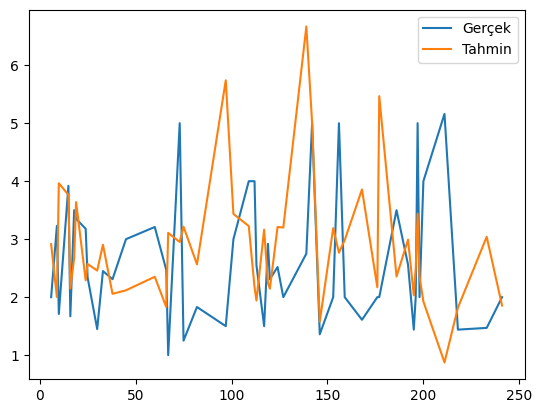

In [12]:
df = pd.DataFrame({"Gerçek":y_test,"Tahmin":y_pred})
df.plot(kind="line")
plt.show()
# ukrayna savaşı gibi çıktı normalidir anlatmaya gerek yok sadece kategorikleri nasıl ekleyecez
# onu görmek istedik ve gördük :D